# SFR vs other quantities
---------------------------------------

We want to understand how the dynamics of the clusters impact on the star formation rate. In particular, how the infall population changes over time. 

In [1]:
from file_loc import FileLocs
from utils import gaussian_kde

ModuleNotFoundError: No module named 'file_loc'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii as at

# Reading Initial Data

In [3]:
fl = FileLocs()
galaxy_file = fl.gal_fname1
# galaxy_file = '../data/groupCatalog_Yang_deCarvalho2017_galaxy_volumeLimited_v1'
cluster_file= fl.cls_fname

In [4]:
print('--------Initial Files-------')
print('Cluster File : %s'%cluster_file)
print('Galaxy File : %s'%galaxy_file)
print()

--------Initial Files-------
Cluster File : ../data/groupCatalog_Yang_deCarvalho2017.csv
Galaxy File : ../data/groups_deCarvalho2017_galaxies_final_flag_johnnyheq_volumeLimited_v1.csv



In [5]:
# load catalogs
cat = at.read(cluster_file)
gal0= at.read(galaxy_file)

In [6]:
cat

Yang,RA,DEC,z,logM200,R200,N200
int64,float64,float64,float64,float64,float64,int64
2,240.5602,16.1113,0.036,15.29,2.01,525
4,247.1149,40.8317,0.03,14.66,1.24,217
5,247.1633,39.4674,0.03,14.81,1.4,277
6,167.6936,28.5374,0.033,14.6,1.18,167
7,351.1194,14.6251,0.042,14.51,1.1,106
8,239.5372,27.3133,0.09,15.1,1.71,183
9,241.5673,18.1483,0.038,14.48,1.08,143
10,223.2712,16.724,0.045,14.22,0.89,106
11,10.4693,-9.3997,0.056,14.96,1.55,156


In [7]:
gal0

Yang,objid,specobjid,distance,ra,dec,mr_petro,mu,mg,mr,mi,mz,mu_Err,mg_err,mr_err,mi_err,mz_err,photo_z,photo_zErr,z,zErr,fracDeV_i,bpt,mass,mass_p16,mass_p84,sfr,sfr_p16,sfr_p84,ssfr,ssfr_p16,ssfr_p84,mass_fire,mass_fire_p16,mass_fire_p84,age_fire,age_fire_p16,age_fire_p84,score,row,redshift,M200,R200,R,Rn,vlos,vlosn,t_infall,infall,orbital,interloper,pinfall,porbital,pinterloper,SF,Pdisk,Pedgeon,PbarGZ2,PbarNair10,Pmerg,Pbulge,Pcigar,TType,PS0
int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2,1237665371723530461,2476009810579974144,136.414517532881,241.096046201536,18.3265225117837,16.04115,18.25859,16.53461,15.80616,15.45665,15.1811,0.02438663,0.004008314,0.003193695,0.003275148,0.00645624,0.037943,0.014221,0.03623576,9.027653e-06,1.0,5,10.17757,10.07869,10.27127,-1.181167,-2.531329,-0.5418066,-11.39744,-12.72209,-10.7545,19890480000.0,19743920000.0,21502640000.0,11076720000.0,6978492000.0,12026300000.0,0.844974,0,0.036,15.29,2.01,5.859935544032298,2.915390817926517,68.2230404421626,0.033405659266334896,83986280254.96938,0,0,1,0.55,0.0,0.45,0,0.0734078,1.67795e-06,0.230802,0.635232,0.461988,0.894254,0.00218124,0.21357,0.844609
2,1237665371723595947,2476012009603229696,136.367342681583,241.143191969945,18.3148193118128,16.56684,17.88546,16.78333,16.39674,16.14023,15.96136,0.02004988,0.004686815,0.0042966,0.004817891,0.0125057,0.046597,0.009936,0.03605689,8.546705e-06,0.0,1,9.505026,9.440042,9.597365,-0.1663915,-0.3841946,0.1018986,-9.73402,-9.971323,-9.456313,1589293000.0,1054919000.0,1929349000.0,3230117000.0,1780746000.0,4379619000.0,0.8677931,1,0.036,15.29,2.01,5.857909061859396,2.914382617840496,16.462541443649773,0.008060943144137724,347930356637.6765,1,0,0,0.71,0.0,0.29,1,0.097623,0.299171,0.165432,0.380331,0.037185,0.00248825,0.965883,4.13005,0.997373
2,1237665371723661557,2477083489036429312,135.738834222632,241.298564879647,18.26084584558,17.48854,19.75721,18.21501,17.37634,16.95171,16.6381,0.0609615,0.008713962,0.005935783,0.006074779,0.01416315,0.117663,0.021792,0.1065375,2.452199e-05,0.4905942,2,10.58861,10.49308,10.68633,-0.07285602,-0.5421439,0.2960085,-10.72217,-11.2,-10.334,37374590000.0,24188360000.0,49324600000.0,8078016000.0,4779446000.0,10227080000.0,0.856566,2,0.036,15.29,2.01,5.830910329430172,2.9009504126518273,20411.78620287162,9.994705168387693,279319933.5309817,0,0,1,0.0,0.0,1.0,1,2.82173e-06,0.867698,0.00190217,0.433231,0.0239045,0.0664576,0.999787,0.42192,0.999222
2,1237665371723726943,2477091735373637632,136.204195492075,241.500714989588,18.1959346410688,14.40143,16.72425,15.12271,14.26843,13.88404,13.59021,0.01797498,0.003051039,0.002401314,0.002479229,0.004752234,0.036194,0.010616,0.03718847,1.854586e-05,0.400819,5,10.79387,10.69631,10.88595,-0.7252186,-2.106907,-0.05099606,-11.5792,-12.95303,-10.87768,14562390000.0,14473980000.0,15976950000.0,13825520000.0,12975890000.0,14975030000.0,0.8468127,3,0.036,15.29,2.01,5.850900775410144,2.9108959081642514,343.9134580687849,0.1683984724646289,16634897919.177307,1,0,0,0.61,0.0,0.39,0,0.995483,0.000529325,0.52153,0.484529,0.470865,0.000103716,0.0322638,5.21621,0.989868
2,1237665428645150969,2445455493263550464,136.235416431339,239.714265155365,18.233198906732,17.00282,18.47984,17.30875,16.87674,16.5741,16.4096,0.03409081,0.005841358,0.005608649,0.006412149,0.01964824,0.069309,0.014935,0.09906808,7.751081e-06,0.1629558,1,10.24621,10.18397,10.32692,0.627578,0.3766055,0.9204919,-9.670296,-9.927934,-9.366477,19043320000.0,12467120000.0,25619520000.0,7278363000.0,5229251000.0,10277060000.0,0.9000694,6,0.036,15.29,2.01,5.

# Mask Data
---------------------

In [8]:
mask = np.abs(gal0['vlosn'])<3.
mask&= gal0['ssfr']>-20

Nsize = np.count_nonzero(mask)

print('Masking Galaxies')
print('New Size: %i'%(Nsize))
print('fraction: %.2f'%(1.*Nsize/len(gal0)))

Masking Galaxies
New Size: 31524
fraction: 0.44


In [9]:
gal = gal0[mask].copy()

## Magnitude Limit
---------------------------------------

Definit the mass limit of the study

In [10]:
mass = 10**np.array(gal['mass'])
z    = np.array(gal['z'])

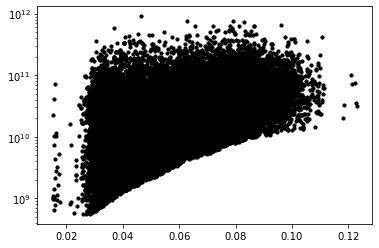

In [11]:
plt.scatter(z,mass,s=10,c='k')
plt.yscale('log')

# Phase Space Analysis
---------------------------------------


In [35]:
mass = np.array(gal['mass'])
sfr  = np.array(gal['sfr'])

rn = np.array(gal['Rn'])
vn = np.array(gal['vlosn'])
t_infall = np.array(gal['t_infall'])/1e9
morph_type = np.array(gal['TType'])

ssfr = np.array(gal['ssfr'])
Pi   = np.array(gal['pinfall'])
Po   = np.array(gal['porbital'])
Pn   = np.array(gal['pinterloper'])

In [36]:
from scipy.stats import binned_statistic_2d


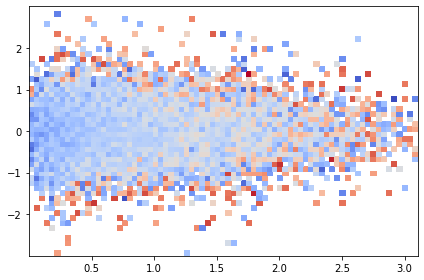

In [90]:
x= vn
y= rn
z= ssfr
Prob = Po

counts, xbins, ybins = np.histogram2d(x, y, weights=Prob, bins=(50, 75))
sums, _, _ = np.histogram2d(x, y, weights=z*Prob, bins=(xbins, ybins))


with np.errstate(divide='ignore', invalid='ignore'):  # suppress possible divide-by-zero warnings
    m3 = plt.pcolormesh(ybins, xbins, sums / counts, cmap='coolwarm')
# plt.colorbar(m3, ax=ax3)
# ax3.set_title('mean values')
plt.tight_layout()
plt.show()

In [68]:
# sum2, binx2, biny2 = np.histogram2d(x, y, bins=100, weights=Prob)
# sum2, binx2, biny2 = np.histogram2d(x, y, bins=100, weights=Prob)

# mean = sum2/
isnan = np.logical_not(np.isnan(ssfr))
ssfr_mean, xedges, yedges, bn = binned_statistic_2d(rn[isnan], vn[isnan], (sfr[isnan]), 'mean', bins=100)



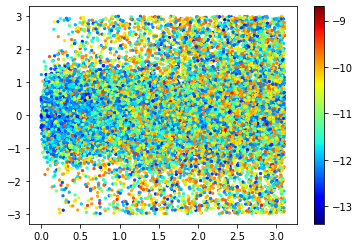

In [76]:
idx = np.argsort(Pi)
plt.scatter(rn[idx],vn[idx],s=5,c=ssfr[idx],cmap='jet')
plt.colorbar()

## Stellar Mass

In [112]:
stellar_mass_label = r'Log($M_{\star}/M_{\odot}$) ' 
sfr_label = r'SFR [$ M_{\star} / yr$]'
ssfr_label= r'sSFR [yr$^{-1}$]'

In [21]:
import pandas as pd
import seaborn as sns

In [113]:
def get_kde(xy,weights=None):
    pdf = gaussian_kde(xy, weights=weights)
    pdf.set_bandwidth(bw_method=pdf.factor / 1.)  # kde bandwidth
    zz2 = pdf((np.ravel(xx), np.ravel(yy)))
    zz2 = np.reshape(zz2, xx.shape)
    return zz2

In [114]:
# grid
xmin, xmax = 9., 12.0
ymin, ymax = -2.5, 1.0
x = np.linspace(xmin, xmax, 100)  # kde resolution
y = np.linspace(ymin, ymax, 100)  # kde resolution
xx, yy = np.meshgrid(x, y)

def SFRmass(x1,x2,x3,xth=0.0,ax=None,title=None,ylabel=sfr_label):
    f = get_kde(np.vstack([x1,x2]),weights=x3)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

#     cfset = ax.contourf(xx, yy, f, cmap='jet')
    ax.imshow(np.rot90(f.T), cmap='jet', extent=[xmin, xmax, ymin, ymax], aspect=0.5)
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel(stellar_mass_label,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    if title is not None:
        ax.set_title(title,fontsize=22)

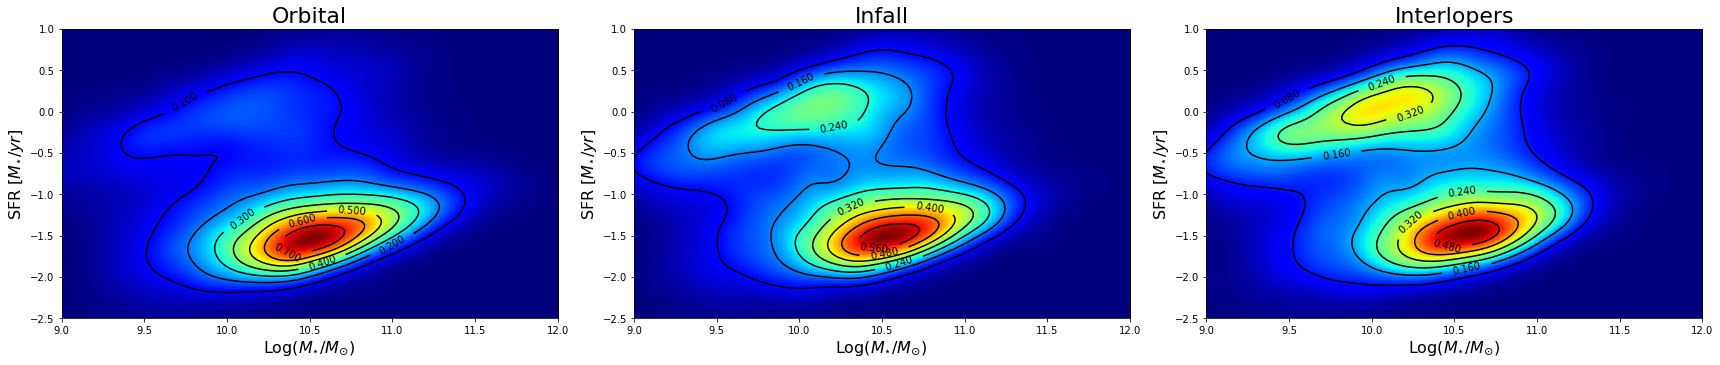

In [116]:
fig, axis = plt.subplots(1, 3, figsize=(24,5))
SFRmass(mass,sfr,Po,ax=axis[0],title='Orbital')
SFRmass(mass,sfr,Pi,ax=axis[1],title='Infall')
SFRmass(mass,sfr,Pn,ax=axis[2],title='Interlopers')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/sfr_mass_dynamical_classes.png',facecolor='w', transparent=False,dpi=150)

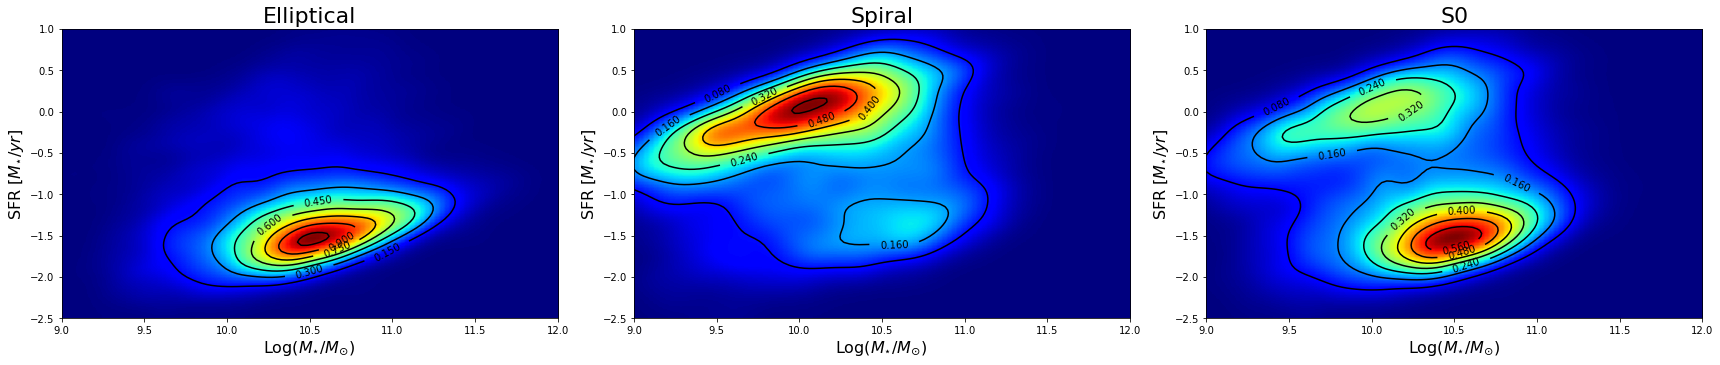

In [115]:
fig, axis = plt.subplots(1, 3, figsize=(24,5))
SFRmass(mass,sfr,Pell,ax=axis[0],title='Elliptical')
SFRmass(mass,sfr,Psp,ax=axis[1],title='Spiral')
SFRmass(mass,sfr,Ps0,ax=axis[2],title='S0')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/sfr_morphological_transformation_smass.png',facecolor='w', transparent=False,dpi=150)

## Radii

In [123]:
radii_label = r'$ R / R_{200}$'

In [124]:
# grid
xmin, xmax = 0., 3.
ymin, ymax = -2.5, 1.0
x = np.linspace(xmin, xmax, 120)  # kde resolution
y = np.linspace(ymin, ymax, 100)  # kde resolution
xx, yy = np.meshgrid(x, y)

def SFRradii(x1,x2,x3,xth=0.0,ax=None,title=None,ylabel=sfr_label):
    f = get_kde(np.vstack([x1,x2]),weights=x3)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

#     cfset = ax.contourf(xx, yy, f, cmap='jet')
    ax.imshow(np.rot90(f.T), cmap='jet', extent=[xmin, xmax, ymin, ymax], aspect=0.5)
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel(radii_label,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    if title is not None:
        ax.set_title(title,fontsize=22)

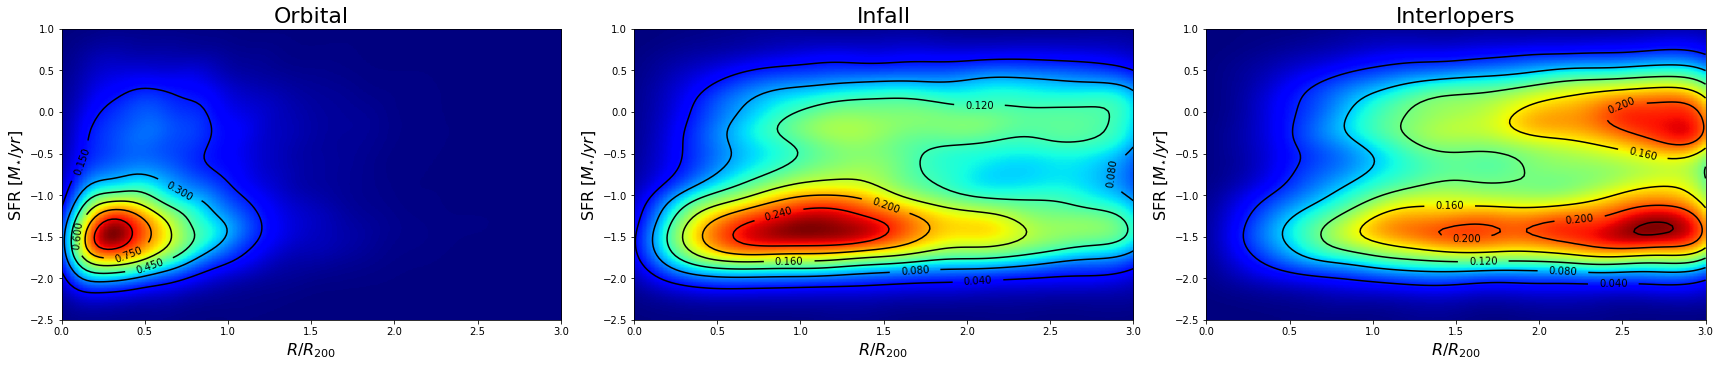

In [125]:
fig, axis = plt.subplots(1, 3, figsize=(24,5))
SFRradii(rn,sfr,Po,ax=axis[0],title='Orbital')
SFRradii(rn,sfr,Pi,ax=axis[1],title='Infall')
SFRradii(rn,sfr,Pn,ax=axis[2],title='Interlopers')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/sfr_radii_dynamical_classes.png',facecolor='w', transparent=False,dpi=150)

In [96]:
from utils import check_non_valid_number

In [102]:
Psp   = np.where(gal['TType'] > 0, 1, 0).astype(int)
Pell  = np.where(gal['TType'] <=0, 1, 0).astype(int)
Ps0   = check_non_valid_number(gal['PS0'])
Ps0[np.isnan(Ps0)] = 0.

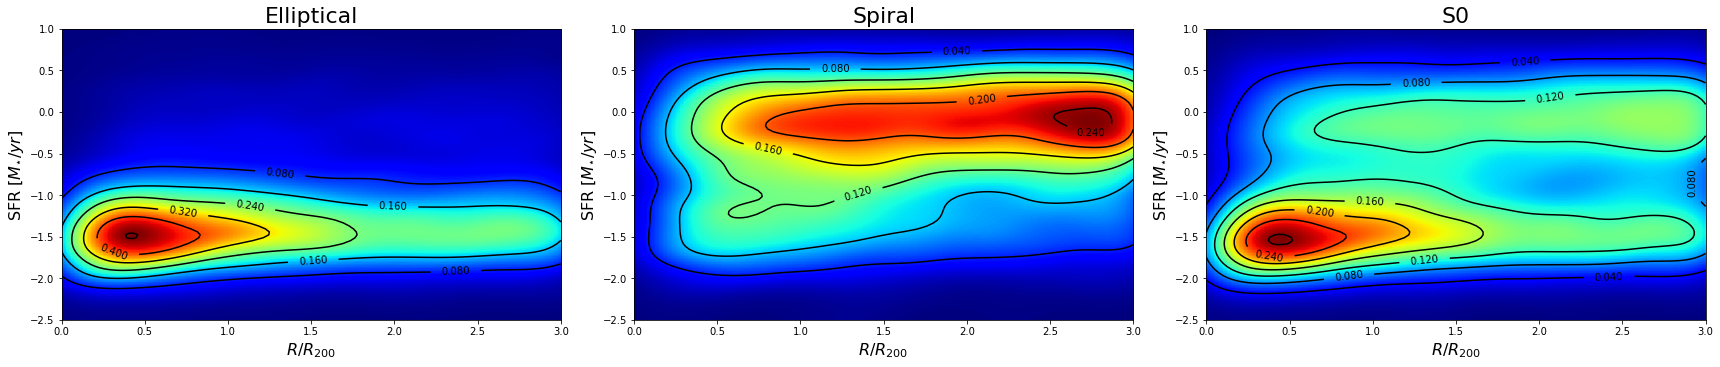

In [108]:
fig, axis = plt.subplots(1, 3, figsize=(24,5))
SFRradii(rn,sfr,Pell,ax=axis[0],title='Elliptical')
SFRradii(rn,sfr,Psp,ax=axis[1],title='Spiral')
SFRradii(rn,sfr,Ps0,ax=axis[2],title='S0')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/sfr_morphological_transformation.png',facecolor='w', transparent=False,dpi=150)

## Free Fall Time

In [126]:
free_fall_label = r'$Log(t_{free-fall}/Gyr) $'

In [127]:
# grid
xmin, xmax = 10**8.2/1e9/2., 10**11.2/1e9/2.
xmin, xmax = np.log10(xmin), np.log10(xmax)
ymin, ymax = -2.5, 1.0
x = np.log10(np.logspace(8.2,11.2,100)/1e9/2.)   #infall time
y = np.linspace(ymin, ymax, 100)  # kde resolution
xx, yy = np.meshgrid(x, y)

def SFRff(x1,x2,x3,xth=0.0,ax=None,title=None,ylabel=sfr_label):
    f = get_kde(np.vstack([x1,x2]),weights=x3)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

#     cfset = ax.contourf(xx, yy, f, cmap='jet')
    ax.imshow(np.rot90(f.T), cmap='jet', extent=[xmin, xmax, ymin, ymax], aspect=0.5)
#     cset = ax.contour(xx, yy, f, colors='k')
#     ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel(free_fall_label,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    #ax.set_xscale('log')
    if title is not None:
        ax.set_title(title,fontsize=22)

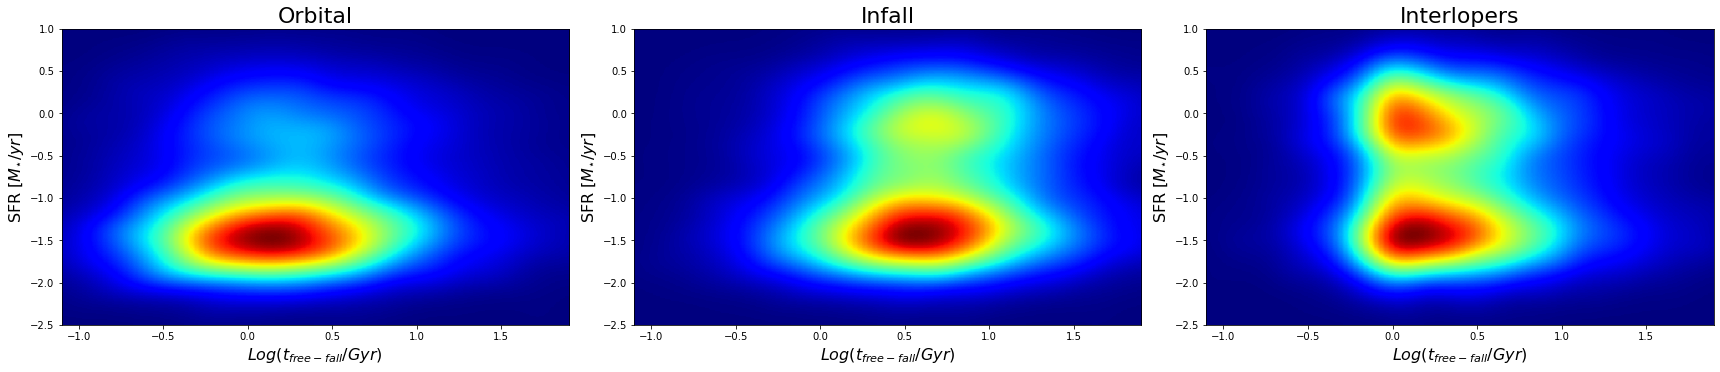

In [128]:
fig, axis = plt.subplots(1, 3, figsize=(24,5))
SFRff(np.log10(t_infall),sfr,Po,ax=axis[0],title='Orbital')
SFRff(np.log10(t_infall),sfr,Pi,ax=axis[1],title='Infall')
SFRff(np.log10(t_infall),sfr,Pn,ax=axis[2],title='Interlopers')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/sfr_free_fall_dynamical_classes.png',facecolor='w', transparent=False,dpi=150)

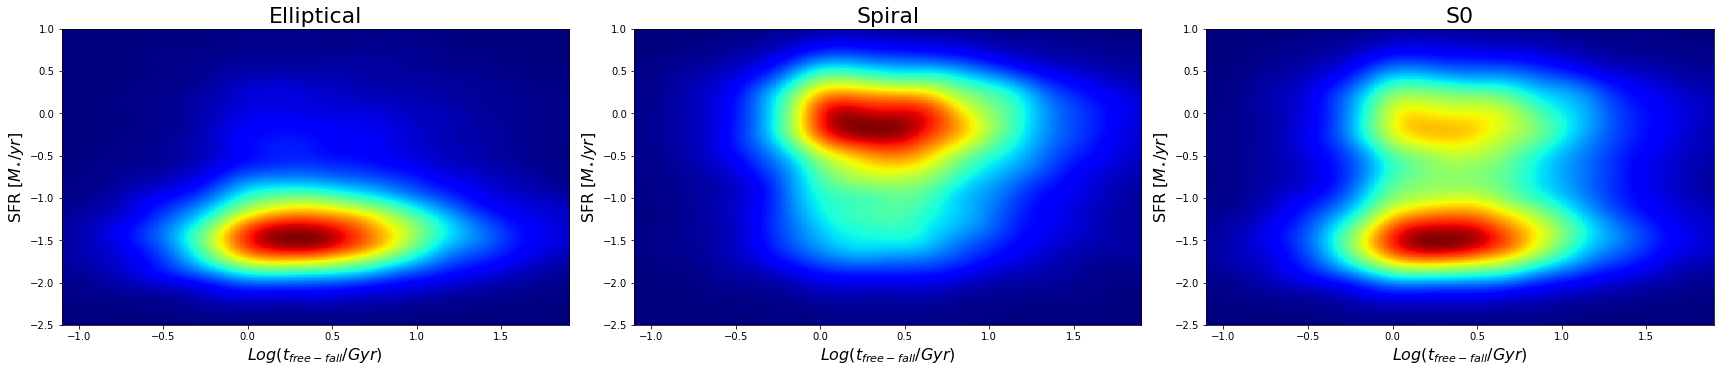

In [111]:
fig, axis = plt.subplots(1, 3, figsize=(24,5))
SFRff(np.log10(t_infall),sfr,Pell,ax=axis[0],title='Elliptical')
SFRff(np.log10(t_infall),sfr,Psp,ax=axis[1],title='Spiral')
SFRff(np.log10(t_infall),sfr,Ps0,ax=axis[2],title='S0')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/sfr_morphological_transformation_free_fall.png',facecolor='w', transparent=False,dpi=150)

## Morphological Type

In [120]:
morph_label = r'TType'

In [121]:
# grid
xmin, xmax = -3., 7.
ymin, ymax = -2.5, 1.0
x = np.linspace(xmin, xmax, 100)
y = np.linspace(ymin, ymax, 100)  # kde resolution
xx, yy = np.meshgrid(x, y)

def SFRmorph(x1,x2,x3,xth=0.0,ax=None,title=None,ylabel=sfr_label):
    f = get_kde(np.vstack([x1,x2]),weights=x3)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    cfset = ax.contourf(xx, yy, f, cmap='jet')
    ax.imshow(np.rot90(f.T), cmap='jet', extent=[xmin, xmax, ymin, ymax], aspect=2.5)
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel(morph_label,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    
    if title is not None:
        ax.set_title(title,fontsize=22)

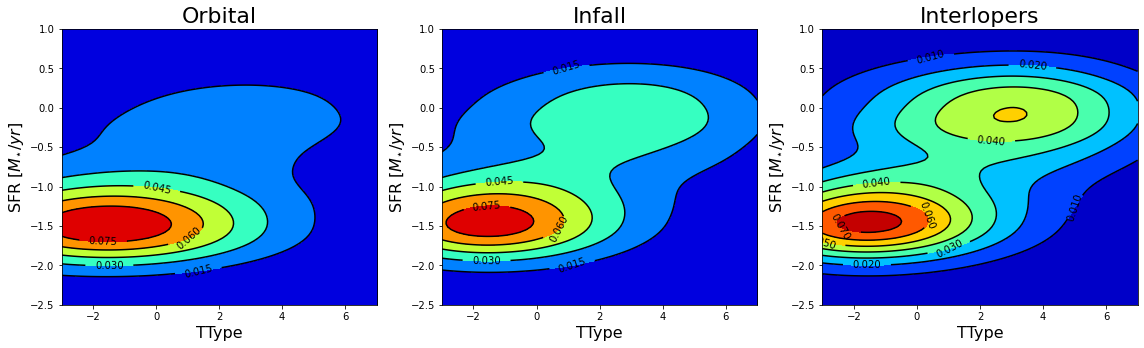

In [122]:
fig, axis = plt.subplots(1, 3, figsize=(16,8))
SFRmorph(morph_type,sfr,Po,ax=axis[0],title='Orbital')
SFRmorph(morph_type,sfr,Pi,ax=axis[1],title='Infall')
SFRmorph(morph_type,sfr,Pn,ax=axis[2],title='Interlopers')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/sfr_morph_dynamical_classes.png',facecolor='w', transparent=False,dpi=150)

# sSFR

In [145]:
# grid
xmin, xmax = 9., 12.0
ymin, ymax = -13.25, -8.75
x = np.linspace(xmin, xmax, 100)  # kde resolution
y = np.linspace(ymin, ymax, 100)  # kde resolution
xx, yy = np.meshgrid(x, y)

def sSFRmass(x1,x2,x3,xth=0.0,ax=None,title=None,ylabel=ssfr_label):
    f = get_kde(np.vstack([x1,x2]),weights=x3)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

#     cfset = ax.contourf(xx, yy, f, cmap='jet')
    ax.imshow(np.rot90(f.T), cmap='jet', extent=[xmin, xmax, ymin, ymax], aspect=0.5)
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel(stellar_mass_label,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    ax.axhline(-11.0,ls='--',lw=3,color='white')
    if title is not None:
        ax.set_title(title,fontsize=22)

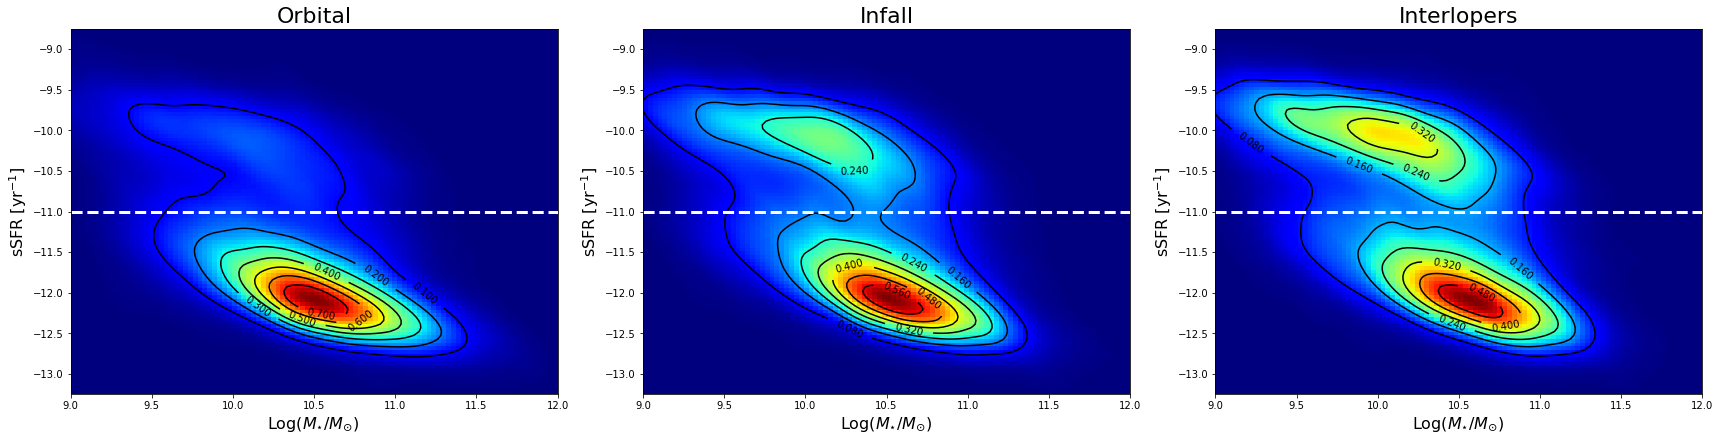

In [146]:
fig, axis = plt.subplots(1, 3, figsize=(24,6))
sSFRmass(mass,ssfr,Po,ax=axis[0],title='Orbital')
sSFRmass(mass,ssfr,Pi,ax=axis[1],title='Infall')
sSFRmass(mass,ssfr,Pn,ax=axis[2],title='Interlopers')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/ssfr_mass_dynamical_classes.png',facecolor='w', transparent=False,dpi=150)

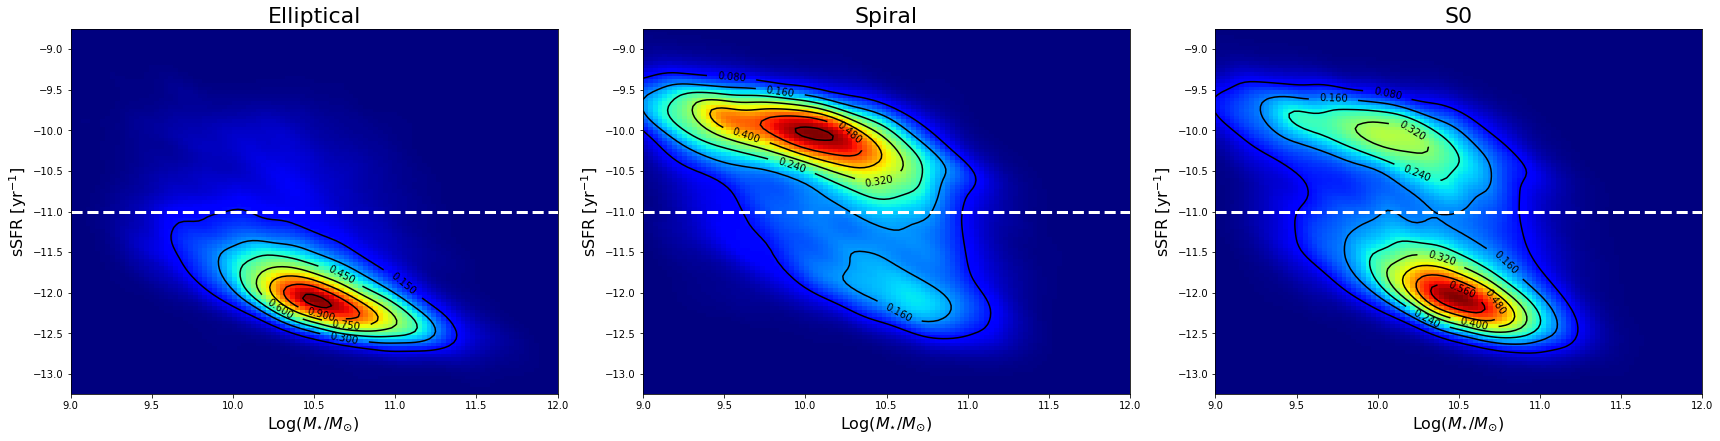

In [148]:
fig, axis = plt.subplots(1, 3, figsize=(24,6))
sSFRmass(mass,ssfr,Pell,ax=axis[0],title='Elliptical')
sSFRmass(mass,ssfr,Psp,ax=axis[1],title='Spiral')
sSFRmass(mass,ssfr,Ps0,ax=axis[2],title='S0')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/ssfr_morphological_transformation_smass.png',facecolor='w', transparent=False,dpi=150)

## Radii

In [123]:
radii_label = r'$ R / R_{200}$'

In [149]:
# grid
xmin, xmax = 0., 3.
x = np.linspace(xmin, xmax, 120)  # kde resolution
y = np.linspace(ymin, ymax, 100)  # kde resolution
xx, yy = np.meshgrid(x, y)

def sSFRradii(x1,x2,x3,xth=0.0,ax=None,title=None,ylabel=ssfr_label):
    f = get_kde(np.vstack([x1,x2]),weights=x3)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

#     cfset = ax.contourf(xx, yy, f, cmap='jet')
    ax.imshow(np.rot90(f.T), cmap='jet', extent=[xmin, xmax, ymin, ymax], aspect=0.5)
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel(radii_label,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    ax.axhline(-11.0,ls='--',lw=3,color='white')
    if title is not None:
        ax.set_title(title,fontsize=22)

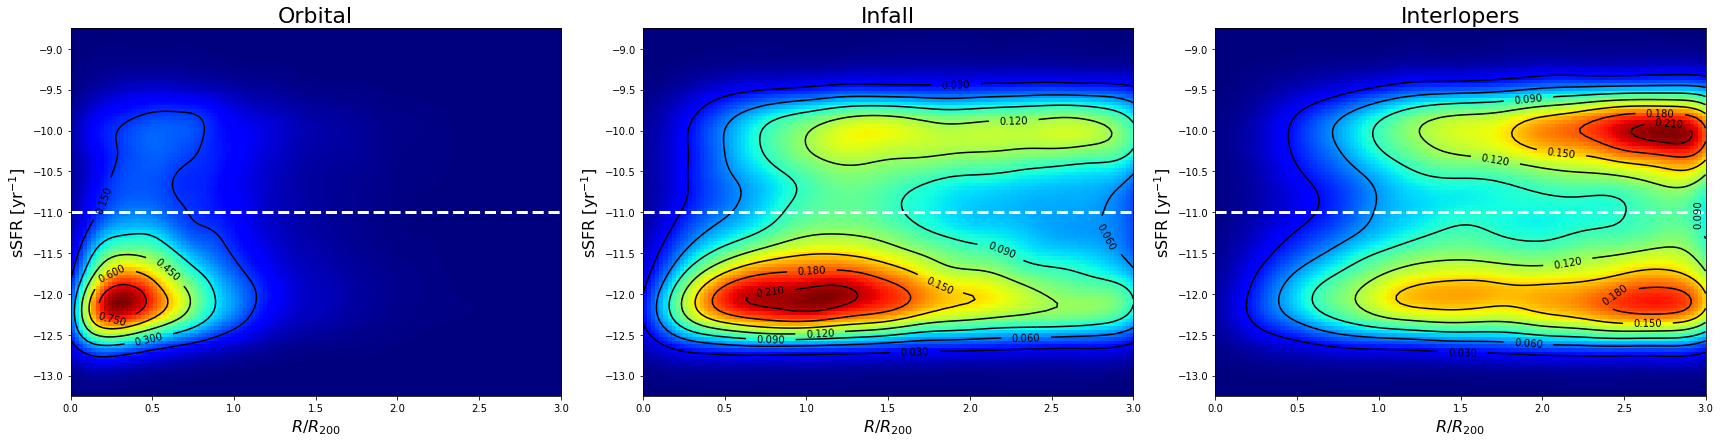

In [150]:
fig, axis = plt.subplots(1, 3, figsize=(24,6))
sSFRradii(rn,ssfr,Po,ax=axis[0],title='Orbital')
sSFRradii(rn,ssfr,Pi,ax=axis[1],title='Infall')
sSFRradii(rn,ssfr,Pn,ax=axis[2],title='Interlopers')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/ssfr_radii_dynamical_classes.png',facecolor='w', transparent=False,dpi=150)

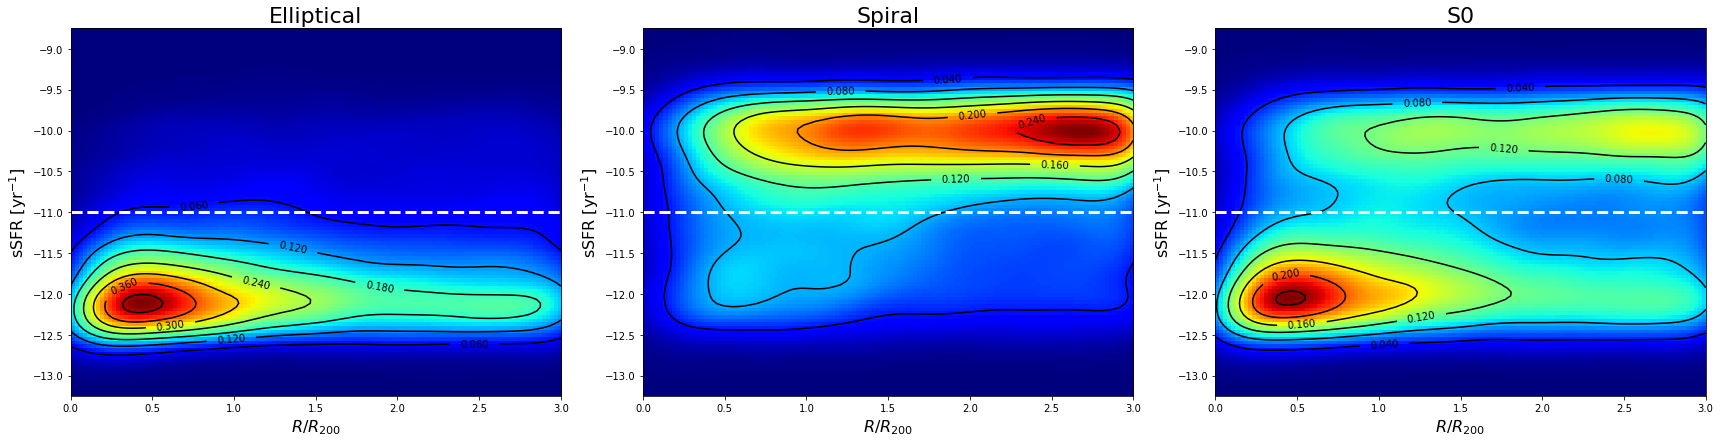

In [152]:
fig, axis = plt.subplots(1, 3, figsize=(24,6))
sSFRradii(rn,ssfr,Pell,ax=axis[0],title='Elliptical')
sSFRradii(rn,ssfr,Psp,ax=axis[1],title='Spiral')
sSFRradii(rn,ssfr,Ps0,ax=axis[2],title='S0')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/ssfr_morphological_transformation.png',facecolor='w', transparent=False,dpi=150)

## Free Fall Time

In [126]:
free_fall_label = r'$Log(t_{free-fall}/Gyr) $'

In [127]:
# grid
xmin, xmax = 10**8.2/1e9/2., 10**11.2/1e9/2.
xmin, xmax = np.log10(xmin), np.log10(xmax)
ymin, ymax = -2.5, 1.0
x = np.log10(np.logspace(8.2,11.2,100)/1e9/2.)   #infall time
y = np.linspace(ymin, ymax, 100)  # kde resolution
xx, yy = np.meshgrid(x, y)

def SFRff(x1,x2,x3,xth=0.0,ax=None,title=None,ylabel=sfr_label):
    f = get_kde(np.vstack([x1,x2]),weights=x3)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

#     cfset = ax.contourf(xx, yy, f, cmap='jet')
    ax.imshow(np.rot90(f.T), cmap='jet', extent=[xmin, xmax, ymin, ymax], aspect=0.5)
#     cset = ax.contour(xx, yy, f, colors='k')
#     ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel(free_fall_label,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    #ax.set_xscale('log')
    if title is not None:
        ax.set_title(title,fontsize=22)

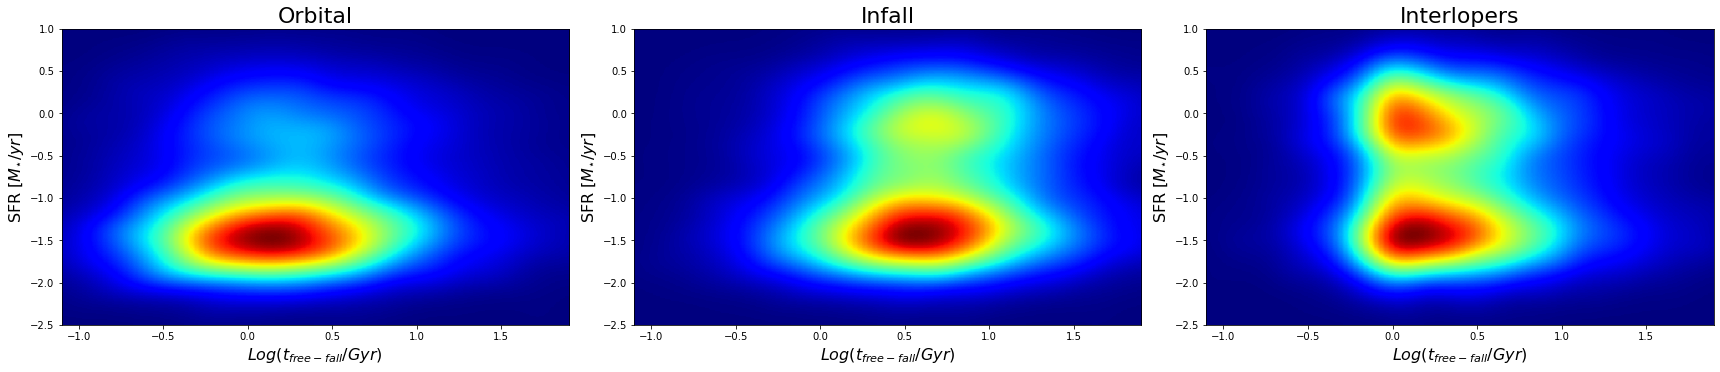

In [128]:
fig, axis = plt.subplots(1, 3, figsize=(24,5))
SFRff(np.log10(t_infall),sfr,Po,ax=axis[0],title='Orbital')
SFRff(np.log10(t_infall),sfr,Pi,ax=axis[1],title='Infall')
SFRff(np.log10(t_infall),sfr,Pn,ax=axis[2],title='Interlopers')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/sfr_free_fall_dynamical_classes.png',facecolor='w', transparent=False,dpi=150)

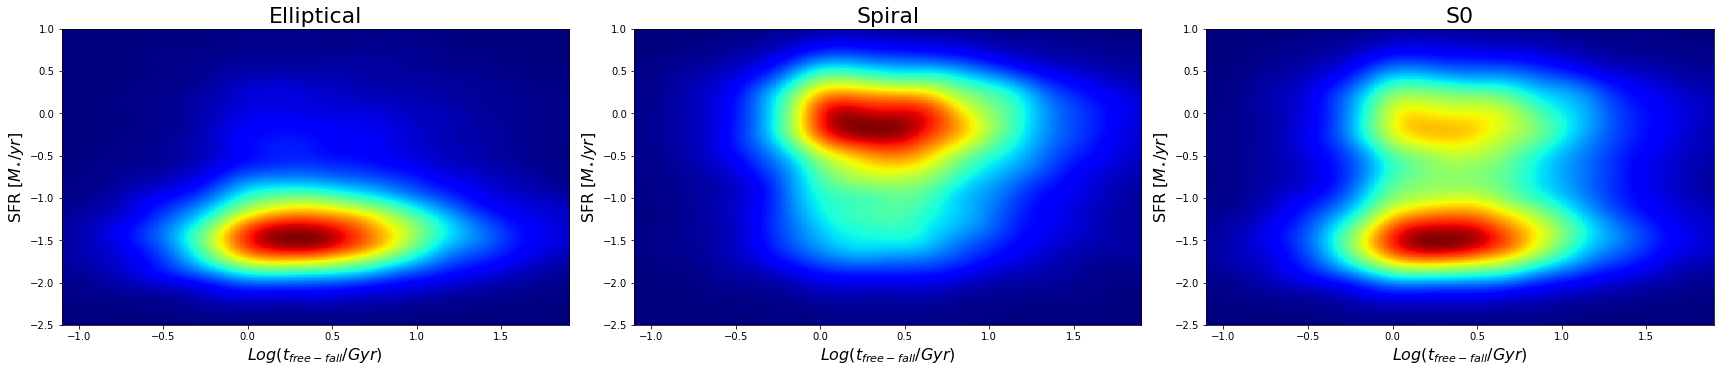

In [111]:
fig, axis = plt.subplots(1, 3, figsize=(24,5))
SFRff(np.log10(t_infall),sfr,Pell,ax=axis[0],title='Elliptical')
SFRff(np.log10(t_infall),sfr,Psp,ax=axis[1],title='Spiral')
SFRff(np.log10(t_infall),sfr,Ps0,ax=axis[2],title='S0')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/sfr_morphological_transformation_free_fall.png',facecolor='w', transparent=False,dpi=150)

## Morphological Type

In [120]:
morph_label = r'TType'

In [153]:
# grid
xmin, xmax = -3., 7.
x = np.linspace(xmin, xmax, 100)
y = np.linspace(ymin, ymax, 100)  # kde resolution
xx, yy = np.meshgrid(x, y)

def sSFRmorph(x1,x2,x3,xth=0.0,ax=None,title=None,ylabel=ssfr_label):
    f = get_kde(np.vstack([x1,x2]),weights=x3)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    cfset = ax.contourf(xx, yy, f, cmap='jet')
    ax.imshow(np.rot90(f.T), cmap='jet', extent=[xmin, xmax, ymin, ymax], aspect=2.5)
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel(morph_label,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    
    if title is not None:
        ax.set_title(title,fontsize=22)

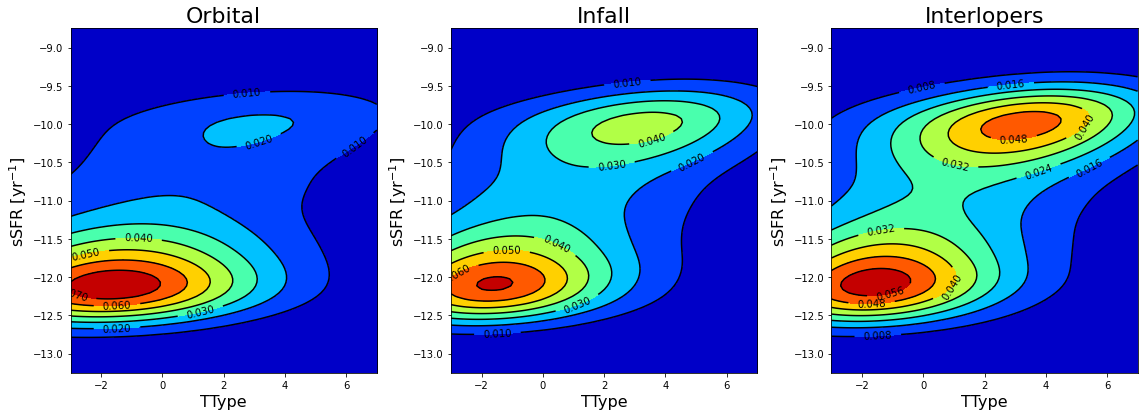

In [155]:
fig, axis = plt.subplots(1, 3, figsize=(16,6))
sSFRmorph(morph_type,ssfr,Po,ax=axis[0],title='Orbital')
sSFRmorph(morph_type,ssfr,Pi,ax=axis[1],title='Infall')
sSFRmorph(morph_type,ssfr,Pn,ax=axis[2],title='Interlopers')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/ssfr_morph_dynamical_classes.png',facecolor='w', transparent=False,dpi=150)